In [35]:
#all imports, library setups here
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import sklearn as sk
import sklearn.cluster as cluster
from sklearn import linear_model, decomposition
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [13]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize==True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    cm = np.round(cm, 2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [3]:
# load cleaned data
dtypespec = {"weeks": object, "peak": object, "var9": object, "var10": object, "var11": object, "var12": object, "var13": object}
billboardDF = pd.read_csv('billboardDF.csv',sep=",",header='infer', dtype=dtypespec)
evolutionDF = pd.read_csv('evolutionDF.csv',sep=",",header='infer')
uniqueTracksDF = pd.read_csv('evolutionDF.csv',sep=",",header='infer')
musicDF = pd.read_csv('musicDF.csv',sep=",",header='infer')
musicSubset = pd.read_csv('musicSubset.csv',sep=",",header='infer')
clusterDF = musicSubset.ix[:, 12:28].copy()

In [46]:
# partition into testing and training
trainingX, testingX, trainingYear, testingYear = train_test_split(clusterDF, musicSubset['year'], test_size=0.20, random_state=42)
trainingX, testingX, trainingDecade, testingDecade = train_test_split(clusterDF, musicSubset['decade'], test_size=0.20, random_state=42)
trainingX, testingX, trainingPeak, testingPeak = train_test_split(clusterDF, musicSubset['max_rank'], test_size=0.20, random_state=42)
trainingX, testingX, trainingWeeks, testingWeeks = train_test_split(clusterDF, musicSubset['weeks'], test_size=0.20, random_state=42)


0.214552188446
1960.0
2000.0
Confusion matrix, without normalization
[[ 17 289 636  90   5]
 [  6 127 492 123   6]
 [  1  31 340 172  13]
 [  3  22 196 197  74]
 [  0  16 282 224  57]]


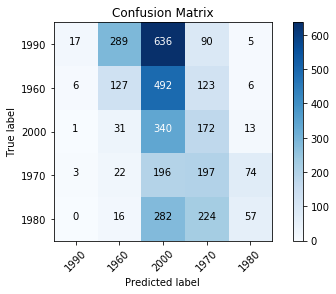

In [47]:
regr = linear_model.LinearRegression()
res = regr.fit(trainingX, trainingDecade)
print(regr.score(testingX, testingDecade))
yHat = regr.predict(testingX)
#conmat = sk.metrics.confusion_matrix(testingDecade, yHat)
yHat = yHat - (yHat % 10) + 10
print(min(yHat))
print(max(yHat))
testingDecade = testingDecade.as_matrix()
conmat = sk.metrics.confusion_matrix(testingDecade, yHat)

plt.figure()
plot_confusion_matrix(conmat, classes=set(testingDecade), normalize=False,
                      title='Confusion Matrix')

plt.show()

In [21]:
14.5 % 10

4.5

In [12]:
pca = sk.decomposition.PCA(n_components = 2)
pca.fit(clusterDF)
clusterPCA = pca.transform(clusterDF)
trainingXpca, testingXpca, trainingYear, testingYear = train_test_split(clusterPCA, musicSubset['year'], test_size=0.20, random_state=42)
trainingXpca, testingXpca, trainingDecade, testingDecade = train_test_split(clusterPCA, musicSubset['decade'], test_size=0.20, random_state=42)
trainingXpca, testingXpca, trainingPeak, testingPeak = train_test_split(clusterPCA, musicSubset['max_rank'], test_size=0.20, random_state=42)
trainingXpca, testingXpca, trainingWeeks, testingWeeks = train_test_split(clusterPCA, musicSubset['weeks'], test_size=0.20, random_state=42)
regr = linear_model.LinearRegression()
res = regr.fit(trainingXpca, trainingDecade)
print(regr.score(testingXpca, testingDecade))

0.081657183932
